In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns
cm = 1/2.54

In [2]:
dateBegin1 = '2024-05-01 00'
dateEnd1 = '2024-05-18 10'
dateBegin1_obj = datetime.strptime(dateBegin1, '%Y-%m-%d %H')
dateBegin1_str = dateBegin1_obj.strftime('%Y-%m-%d %H:%M')

dateEnd1_obj = datetime.strptime(dateEnd1, '%Y-%m-%d %H')
dateEnd1_str = dateEnd1_obj.strftime('%Y-%m-%d %H:%M')
downlink_receiver = 'downlink_receiver.csv'
df_downlink_receiver = pd.read_csv(downlink_receiver)
df_downlink_receiver['timestamp'] = pd.to_datetime(df_downlink_receiver['timestamp'])
df_downlink_receiver = df_downlink_receiver.set_index('timestamp')

downlinkUDP_receiver = 'downlinkUDP_receiver.csv'
df_downlinkUDP_receiver = pd.read_csv(downlinkUDP_receiver)
df_downlinkUDP_receiver['timestamp'] = pd.to_datetime(df_downlinkUDP_receiver['timestamp'])
df_downlinkUDP_receiver = df_downlinkUDP_receiver.set_index('timestamp')
df_downlink_receiver = df_downlink_receiver.loc[dateBegin1:dateEnd1]
df_downlinkUDP_receiver = df_downlinkUDP_receiver.loc[dateBegin1:dateEnd1]


bitrate1 = pd.to_numeric(df_downlink_receiver['bitrate'])
bitrate2 = pd.to_numeric(df_downlinkUDP_receiver['bitrate'],errors='coerce')
df_downlinkUDP_receiver["bitrate"] = pd.to_numeric(df_downlinkUDP_receiver['bitrate'], errors='coerce')

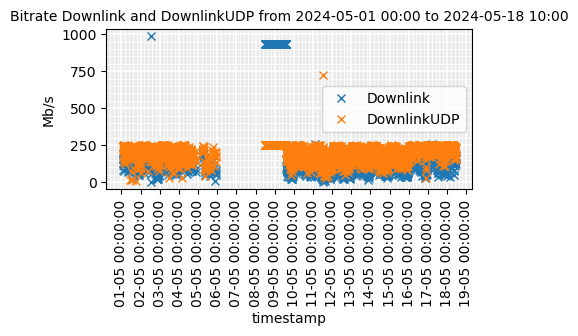

In [14]:
fig, ax = plt.subplots()
bitrate1.plot(ax=ax,ls='', marker='x',figsize=(12*cm, 6*cm))
bitrate2.plot(ax=ax,ls='', marker='x',figsize=(12*cm, 6*cm))



#set major ticks format
title_str = f'Bitrate Downlink and DownlinkUDP from {dateBegin1_str} to {dateEnd1_str}'
plt.ylabel('Mb/s')
plt.title(title_str, fontsize=10)
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.minorticks_on()
ax.legend(['Downlink','DownlinkUDP'])

#set ticks every hour
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(which='minor', bottom=False, left=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))
plt.savefig('downlink_TCPvUDP.png',bbox_inches='tight')

In [4]:
dates1 = df_downlink_receiver.index.date
hours1 = df_downlink_receiver.index.hour
dates2 = df_downlinkUDP_receiver.index.date
hours2 = df_downlinkUDP_receiver.index.hour

df_downlink_receiver=df_downlink_receiver.assign(dates=dates1)
df_downlink_receiver=df_downlink_receiver.assign(hours=hours1)

df_downlinkUDP_receiver=df_downlinkUDP_receiver.assign(dates=dates2)
df_downlinkUDP_receiver=df_downlinkUDP_receiver.assign(hours=hours2)

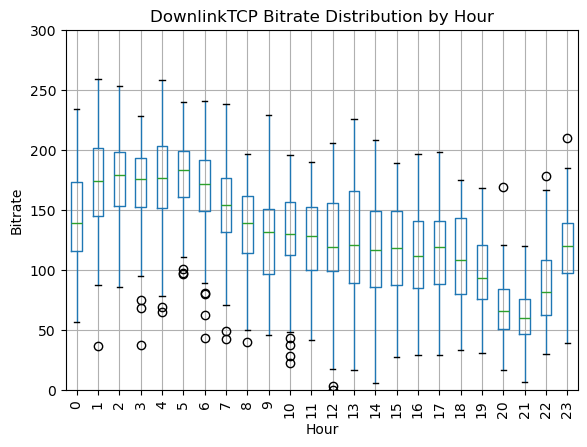

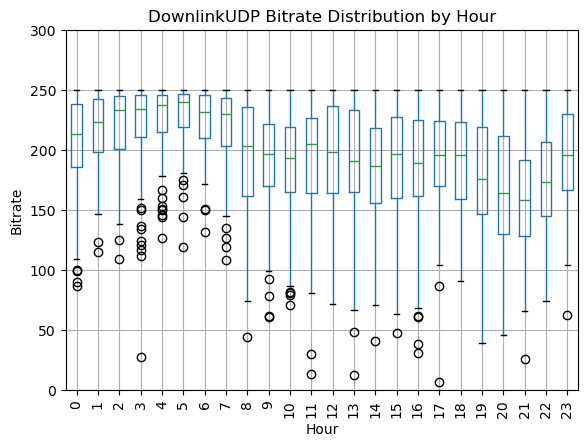

In [5]:
fig, ax1 = plt.subplots()
df_downlink_receiver.boxplot(ax=ax1,column='bitrate',by='hours',figsize=(13*cm, 6*cm))
for label in ax1.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax1.get_figure().suptitle("")
ax1.set_ylim(bottom=0, top=300)
ax1.set_title('DownlinkTCP Bitrate Distribution by Hour')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Bitrate')
plt.savefig('downlinkTCPhour.png')
plt.show()

fig, ax1 = plt.subplots()

df_downlinkUDP_receiver.boxplot(ax=ax1,column='bitrate',by='hours',figsize=(13*cm, 6*cm))
for label in ax1.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax1.get_figure().suptitle("")
ax1.set_title('DownlinkUDP Bitrate Distribution by Hour')
ax1.set_xlabel('Hour')
ax1.set_ylim(bottom=0, top=300)
ax1.set_ylabel('Bitrate')
plt.savefig('downlinkUDPhour.png')
plt.show()

In [6]:
print(df_downlink_receiver)

                     transfer  bitrate       dates  hours
timestamp                                                
2024-05-01 01:50:43     942.0    198.0  2024-05-01      1
2024-05-01 01:55:43     753.0    158.0  2024-05-01      1
2024-05-01 02:00:43     540.0    113.0  2024-05-01      2
2024-05-01 02:05:43     757.0    159.0  2024-05-01      2
2024-05-01 02:10:42     408.0     85.5  2024-05-01      2
...                       ...      ...         ...    ...
2024-05-18 10:35:43     739.0    155.0  2024-05-18     10
2024-05-18 10:40:43     828.0    174.0  2024-05-18     10
2024-05-18 10:45:42     856.0    180.0  2024-05-18     10
2024-05-18 10:50:43     575.0    121.0  2024-05-18     10
2024-05-18 10:55:43     747.0    157.0  2024-05-18     10

[3543 rows x 4 columns]


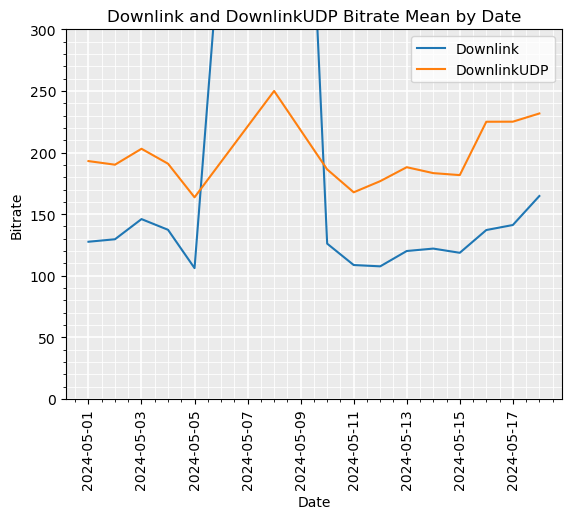

In [7]:
fig, ax1 = plt.subplots()
df_downlink_receiver_mean = df_downlink_receiver.groupby('dates').mean(numeric_only=True)[['bitrate']]
df_downlinkUDP_receiver_mean = df_downlinkUDP_receiver.groupby('dates').mean(numeric_only=True)[['bitrate']]
df_downlink_receiver_mean['bitrate'].plot(ax=ax1)
df_downlinkUDP_receiver_mean['bitrate'].plot(ax=ax1)
ax1.set_facecolor('#EBEBEB')
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)
ax1.minorticks_on()
ax1.legend(['Downlink','DownlinkUDP'])
for label in ax1.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax1.get_figure().suptitle("")
ax1.set_title('Downlink and DownlinkUDP Bitrate Mean by Date')
ax1.set_xlabel('Date')
ax1.set_ylim(bottom=0, top=300)
ax1.set_ylabel('Bitrate')
plt.show()

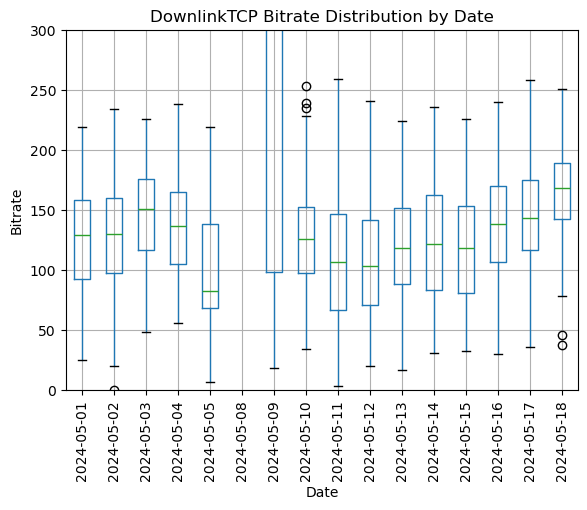

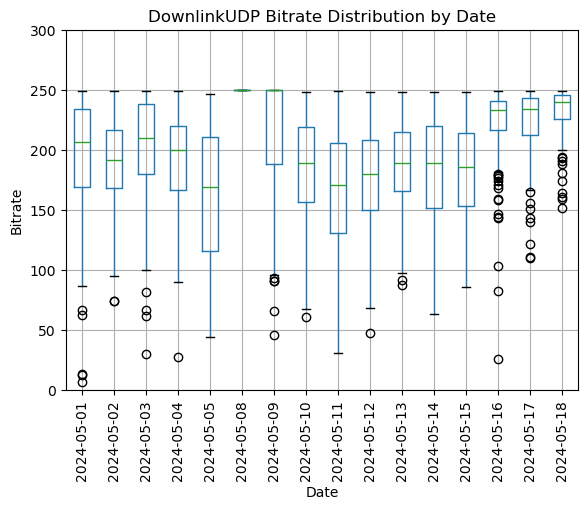

In [8]:

fig, ax2 = plt.subplots()
df_downlink_receiver.boxplot(ax=ax2,column='bitrate',by='dates')
for label in ax2.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax2.get_figure().suptitle("")
ax2.set_ylim(bottom=0, top=300)
ax2.set_title('DownlinkTCP Bitrate Distribution by Date')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bitrate')
plt.show()

fig, ax2 = plt.subplots()
df_downlinkUDP_receiver.boxplot(ax=ax2,column='bitrate',by='dates')
for label in ax2.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax2.get_figure().suptitle("")
ax2.set_ylim(bottom=0, top=300)
ax2.set_title('DownlinkUDP Bitrate Distribution by Date')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bitrate')
plt.show()